In [1]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')

In [3]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,NaN,NaN,59,ALC,ALC8_0_2,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,0.09,0.09,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(38.907192, -77.036871)",NaN,11,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(13.444304, 144.793731)",NaN,66,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(18.220833, -66.590149)",NaN,72,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,NaN,NaN,59,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN


In [4]:
df.Topic.value_counts()

Diabetes                                           79631
Chronic Obstructive Pulmonary Disease              78729
Cardiovascular Disease                             75787
Arthritis                                          41765
Overarching Conditions                             39362
Asthma                                             39261
Nutrition, Physical Activity, and Weight Status    33621
Alcohol                                            31850
Tobacco                                            29306
Older Adults                                       15300
Cancer                                             14101
Chronic Kidney Disease                             12395
Oral Health                                        11137
Mental Health                                       7225
Immunization                                        5220
Disability                                          2968
Reproductive Health                                 2060
Name: Topic, dtype: int64

In [5]:
df_diabetes = df[(df['Topic'] == 'Diabetes')]

In [6]:
df_diabetes.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [9]:
df_diabetes.drop(['Response','DataValueFootnoteSymbol','DatavalueFootnote','StratificationCategory2','Stratification2', 'StratificationCategory3', 'Stratification3','ResponseID','StratificationCategoryID2', 'StratificationID2','StratificationCategoryID3','StratificationID3'],axis = 1,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
df_diabetes.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
258,2012,2012,IL,Illinois,BRFSS,Diabetes,Foot examination among adults aged >= 18 years...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,Gender,Male,"(40.485010283, -88.997710178)",17,DIA,DIA5_0,AGEADJPREV,GENDER,GENM
262,2011,2011,IL,Illinois,BRFSS,Diabetes,Foot examination among adults aged >= 18 years...,%,Crude Prevalence,NaN,NaN,NaN,NaN,Gender,Male,"(40.485010283, -88.997710178)",17,DIA,DIA5_0,CRDPREV,GENDER,GENM
276,2010,2010,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,51.9,51.9,42.1,61.7,Gender,Female,"(64.845079957001, -147.722059036)",2,DIA,DIA1_1,AGEADJRATE,GENDER,GENF
303,2011,2011,KS,Kansas,NVSS,Diabetes,Mortality with diabetic ketoacidosis reported ...,NaN,Number,27,27.0,NaN,NaN,Overall,Overall,"(38.3477403, -98.200781227)",20,DIA,DIA1_2,NMBR,OVERALL,OVR
308,2016,2016,FL,Florida,BRFSS,Diabetes,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,48,48.0,42.9,53.2,Race/Ethnicity,"White, non-Hispanic","(28.932040377, -81.928960539)",12,DIA,DIA12_1,CRDPREV,RACE,WHT


In [15]:
df['GeoLocation'] = df['GeoLocation'].replace(to_replace='\(|\)', value="", regex=True)

In [16]:
lat = []
lng = []

for row in df['GeoLocation']:
    try:
        lat.append(row.split(',')[0])
        lng.append(row.split(',')[1])
    except:
        lat.append(np.NaN)
        lng.append(np.NaN)
        
df['Latitute'] = lat
df['longitude'] = lng

In [18]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Latitute,longitude
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,NaN,NaN,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_2,USD,OVERALL,OVR,NaN,NaN
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,0.09,0.09,NaN,NaN,Overall,Overall,"38.907192, -77.036871",11,ALC,ALC8_0_1,USD,OVERALL,OVR,38.907192,-77.036871
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,NaN,NaN,NaN,Overall,Overall,"13.444304, 144.793731",66,ALC,ALC8_0_1,USD,OVERALL,OVR,13.444304,144.793731
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,NaN,NaN,NaN,Overall,Overall,"18.220833, -66.590149",72,ALC,ALC8_0_1,USD,OVERALL,OVR,18.220833,-66.590149
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,NaN,NaN,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN


In [20]:
df_diabetes = df[(df['Topic'] == 'Diabetes')]

In [21]:
df_diabetes.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Latitute,longitude
258,2012,2012,IL,Illinois,BRFSS,Diabetes,Foot examination among adults aged >= 18 years...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,Gender,Male,"40.485010283, -88.997710178",17,DIA,DIA5_0,AGEADJPREV,GENDER,GENM,40.485010283,-88.997710178
262,2011,2011,IL,Illinois,BRFSS,Diabetes,Foot examination among adults aged >= 18 years...,%,Crude Prevalence,NaN,NaN,NaN,NaN,Gender,Male,"40.485010283, -88.997710178",17,DIA,DIA5_0,CRDPREV,GENDER,GENM,40.485010283,-88.997710178
276,2010,2010,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,51.9,51.9,42.1,61.7,Gender,Female,"64.845079957001, -147.722059036",2,DIA,DIA1_1,AGEADJRATE,GENDER,GENF,64.845079957001,-147.722059036
303,2011,2011,KS,Kansas,NVSS,Diabetes,Mortality with diabetic ketoacidosis reported ...,NaN,Number,27,27.0,NaN,NaN,Overall,Overall,"38.3477403, -98.200781227",20,DIA,DIA1_2,NMBR,OVERALL,OVR,38.3477403,-98.200781227
308,2016,2016,FL,Florida,BRFSS,Diabetes,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,48,48.0,42.9,53.2,Race/Ethnicity,"White, non-Hispanic","28.932040377, -81.928960539",12,DIA,DIA12_1,CRDPREV,RACE,WHT,28.932040377,-81.928960539


In [23]:
list2 = df_diabetes['Question'].to_list()

In [25]:
from collections import Counter
print (Counter(list2))

Counter({'Mortality due to diabetes reported as any listed cause of death': 6135, 'Mortality with diabetic ketoacidosis reported as any listed cause of death': 6135, 'Foot examination among adults aged >= 18 years with diagnosed diabetes': 5220, 'Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes': 5220, 'Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course': 5220, 'Prevalence of diagnosed diabetes among adults aged >= 18 years': 5220, 'Dilated eye examination among adults aged >= 18 years with diagnosed diabetes': 5220, 'Prevalence of depressive disorders among adults aged >= 18 years with diagnosed diabetes': 5220, 'Glycosylated hemoglobin measurement among adults aged >= 18 years with diagnosed diabetes': 5220, 'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with diagnosed diabetes': 5220, 'Influenza vaccination among noninstitutionalized adults aged >= 65 years wit

In [28]:
df_diabetes.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
DataValueUnit                 object
DataValueType                 object
DataValue                    float64
DataValueAlt                 float64
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
GeoLocation                   object
LocationID                     int64
TopicID                       object
QuestionID                    object
DataValueTypeID               object
StratificationCategoryID1     object
StratificationID1             object
Latitute                      object
longitude                     object
dtype: object

In [27]:
df_diabetes['DataValue'] = df_diabetes['DataValue'].apply(pd.to_numeric, downcast='float', errors='coerce')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_diabetes.groupby(['YearEnd','Stratification1'])['DataValue'].mean().round()

YearEnd  Stratification1                 
2010     American Indian or Alaska Native     325.0
         Asian or Pacific Islander            744.0
         Black, non-Hispanic                 2412.0
         Female                              5765.0
         Hispanic                            2100.0
         Male                                5263.0
         Overall                             9461.0
         White, non-Hispanic                 6463.0
2011     American Indian or Alaska Native     116.0
         Asian or Pacific Islander            109.0
         Black, non-Hispanic                   96.0
         Female                               126.0
         Hispanic                              82.0
         Male                                 131.0
         Multiracial, non-Hispanic             41.0
         Other, non-Hispanic                   47.0
         Overall                              332.0
         White, non-Hispanic                  172.0
2012     American Indi

In [30]:
diabetes = df_diabetes.pivot_table(values =['YearEnd'], index =['LocationDesc', 'Stratification1','Question','DataValueUnit','DataValue'],  aggfunc = np.mean) 

In [35]:
df_diabetes.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Latitute,longitude
258,2012,2012,IL,Illinois,BRFSS,Diabetes,Foot examination among adults aged >= 18 years...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,Gender,Male,"40.485010283, -88.997710178",17,DIA,DIA5_0,AGEADJPREV,GENDER,GENM,40.485010283,-88.997710178
262,2011,2011,IL,Illinois,BRFSS,Diabetes,Foot examination among adults aged >= 18 years...,%,Crude Prevalence,NaN,NaN,NaN,NaN,Gender,Male,"40.485010283, -88.997710178",17,DIA,DIA5_0,CRDPREV,GENDER,GENM,40.485010283,-88.997710178
276,2010,2010,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,51.900002,51.9,42.1,61.7,Gender,Female,"64.845079957001, -147.722059036",2,DIA,DIA1_1,AGEADJRATE,GENDER,GENF,64.845079957001,-147.722059036
303,2011,2011,KS,Kansas,NVSS,Diabetes,Mortality with diabetic ketoacidosis reported ...,NaN,Number,27.000000,27.0,NaN,NaN,Overall,Overall,"38.3477403, -98.200781227",20,DIA,DIA1_2,NMBR,OVERALL,OVR,38.3477403,-98.200781227
308,2016,2016,FL,Florida,BRFSS,Diabetes,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,48.000000,48.0,42.9,53.2,Race/Ethnicity,"White, non-Hispanic","28.932040377, -81.928960539",12,DIA,DIA12_1,CRDPREV,RACE,WHT,28.932040377,-81.928960539


In [31]:
diabetes.to_csv('diabetes.csv')

In [33]:
df2 = pd.read_csv('diabetes.csv')

In [36]:
df2.head()

,LocationDesc,Stratification1,Question,DataValueUnit,DataValue,YearEnd
0,Alabama,"Black, non-Hispanic",Adults with diagnosed diabetes aged >= 18 year...,%,53.000000,2013.0
1,Alabama,"Black, non-Hispanic",Adults with diagnosed diabetes aged >= 18 year...,%,53.099998,2012.5
2,Alabama,"Black, non-Hispanic",Adults with diagnosed diabetes aged >= 18 year...,%,53.400002,2011.0
3,Alabama,"Black, non-Hispanic",Adults with diagnosed diabetes aged >= 18 year...,%,57.299999,2016.0
4,Alabama,"Black, non-Hispanic",Adults with diagnosed diabetes aged >= 18 year...,%,58.200001,2012.0


In [51]:
df2.groupby(['Stratification1','Question'])['DataValue'].mean().reset_index()

,Stratification1,Question,DataValue
0,American Indian or Alaska Native,Amputation of a lower extremity attributable t...,25.481364
1,American Indian or Alaska Native,Hospitalization with diabetes as a listed diag...,539.807184
2,American Indian or Alaska Native,Mortality due to diabetes reported as any list...,125.958986
3,Asian or Pacific Islander,Amputation of a lower extremity attributable t...,31.841591
4,Asian or Pacific Islander,Hospitalization with diabetes as a listed diag...,1057.172222
5,Asian or Pacific Islander,Mortality due to diabetes reported as any list...,39.529779
6,Asian or Pacific Islander,Mortality with diabetic ketoacidosis reported ...,0.600000
7,"Black, non-Hispanic",Adults with diagnosed diabetes aged >= 18 year...,57.528632
8,"Black, non-Hispanic",Amputation of a lower extremity attributable t...,136.340073
9,"Black, non-Hispanic",Diabetes prevalence among women aged 18-44 years,7.931343


In [49]:
df2.pivot_table(values =['YearEnd'], index =['LocationDesc', 'Stratification1','Question','DataValueUnit','DataValue'],  aggfunc = np.sum) 

YearEnd
LocationDesc Stratification1     Question                                           DataValueUnit DataValue         
Alabama      Black, non-Hispanic Adults with diagnosed diabetes aged >= 18 years... %             53.000000   2013.0
                                                                                                  53.099998   2012.5
                                                                                                  53.400002   2011.0
                                                                                                  57.299999   2016.0
                                                                                                  58.200001   2012.0
                                                                                                  58.799999   2011.0
                                                                                                  60.700001   2016.0
                                 Diabetes prevalence among women aged 18-44 years   %             5.500000    2016.0
                                                                                                  7.300000    2014.0
                                                                                                  8.100000    2015.0
                                                                                                  9.200000    2011.0
                                                                                                  10.000000   2012.0
                                                                                                  10.600000   2013.0
                                 Dilated eye examination among adults aged >= 18... %             54.099998   2012.0
                                                                                                  55.000000   2016.0
                                                                                                  62.299999   2013.0
                                                                                                  63.099998   2011.0
                                                                                                  64.199997   2013.0
                                                                                                  66.199997   2012.0
                                                                                                  68.199997   2011.0
                                                                                                  71.699997   2016.0
                                 Foot examination among adults aged >= 18 years ... %             55.599998   2016.0
                                                                                                  65.000000   2012.0
                                                                                                  71.400002   2016.0
                                                                                                  71.500000   2013.0
                                                                                                  73.599998   2011.0
                                                                                                  73.800003   2012.0
                                                                                                  74.000000   2013.0
                                                                                                  80.699997   2011.0
                                 Glycosylated hemoglobin measurement among adult... %             61.400002   2012.0
...                                                                                                              ...
Wyoming      White, non-Hispanic Prevalence of depressive disorders among adults... %             39.500000   2013.0
                                                                                                  39.599998   2014.0
              

In [52]:
def disease_stats(year,state,):
    state_avg = df_diabetes[(df_diabetes.YearEnd== year)&(df_diabetes.LocationAbbr== state)].groupby(['Question','QuestionID','Stratification1','DataValueUnit','DataValueType'])['DataValue'].agg('mean').reset_index()
    return state_avg

In [53]:
disease_stats(2012,'NJ')

,Question,QuestionID,Stratification1,DataValueUnit,DataValueType,DataValue
0,Adults with diagnosed diabetes aged >= 18 year...,DIA10_0,"Black, non-Hispanic",%,Age-adjusted Prevalence,64.099998
1,Adults with diagnosed diabetes aged >= 18 year...,DIA10_0,"Black, non-Hispanic",%,Crude Prevalence,50.500000
2,Adults with diagnosed diabetes aged >= 18 year...,DIA10_0,Female,%,Age-adjusted Prevalence,57.099998
3,Adults with diagnosed diabetes aged >= 18 year...,DIA10_0,Female,%,Crude Prevalence,47.700001
4,Adults with diagnosed diabetes aged >= 18 year...,DIA10_0,Hispanic,%,Age-adjusted Prevalence,43.099998
5,Adults with diagnosed diabetes aged >= 18 year...,DIA10_0,Hispanic,%,Crude Prevalence,45.500000
6,Adults with diagnosed diabetes aged >= 18 year...,DIA10_0,Male,%,Age-adjusted Prevalence,46.599998
7,Adults with diagnosed diabetes aged >= 18 year...,DIA10_0,Male,%,Crude Prevalence,45.400002
8,Adults with diagnosed diabetes aged >= 18 year...,DIA10_0,"Multiracial, non-Hispanic",%,Age-adjusted Prevalence,NaN
9,Adults with diagnosed diabetes aged >= 18 year...,DIA10_0,"Multiracial, non-Hispanic",%,Crude Prevalence,NaN


In [62]:
df_diabetes.groupby(['LocationDesc'])['DataValue'].mean().sort_values(ascending=False, na_position='first')

LocationDesc
Florida                 4733.398090
New York                4553.239130
United States           2810.716030
California              2687.458355
Michigan                2625.132457
North Carolina          2171.822990
New Jersey              1693.215404
Kentucky                1476.782594
Arizona                 1336.188320
Washington              1257.788997
Wisconsin               1248.525536
Maryland                1157.005882
Arkansas                 924.104466
South Carolina           891.576660
Georgia                  875.211098
Iowa                     843.790351
Oregon                   816.703790
Colorado                 783.493820
West Virginia            704.294951
Nevada                   652.592550
Massachusetts            595.880266
Mississippi              416.980683
New Mexico               383.540546
Minnesota                370.526052
Rhode Island             294.434817
Hawaii                   284.493403
Nebraska                 281.541613
South Dakota   

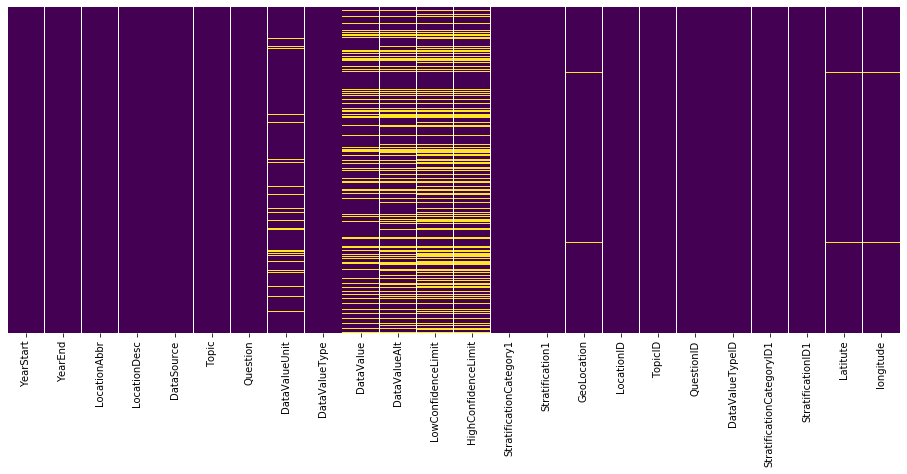

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
